In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib as mpl
import numpy as np
import scipy as sp
import json
import sys

c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

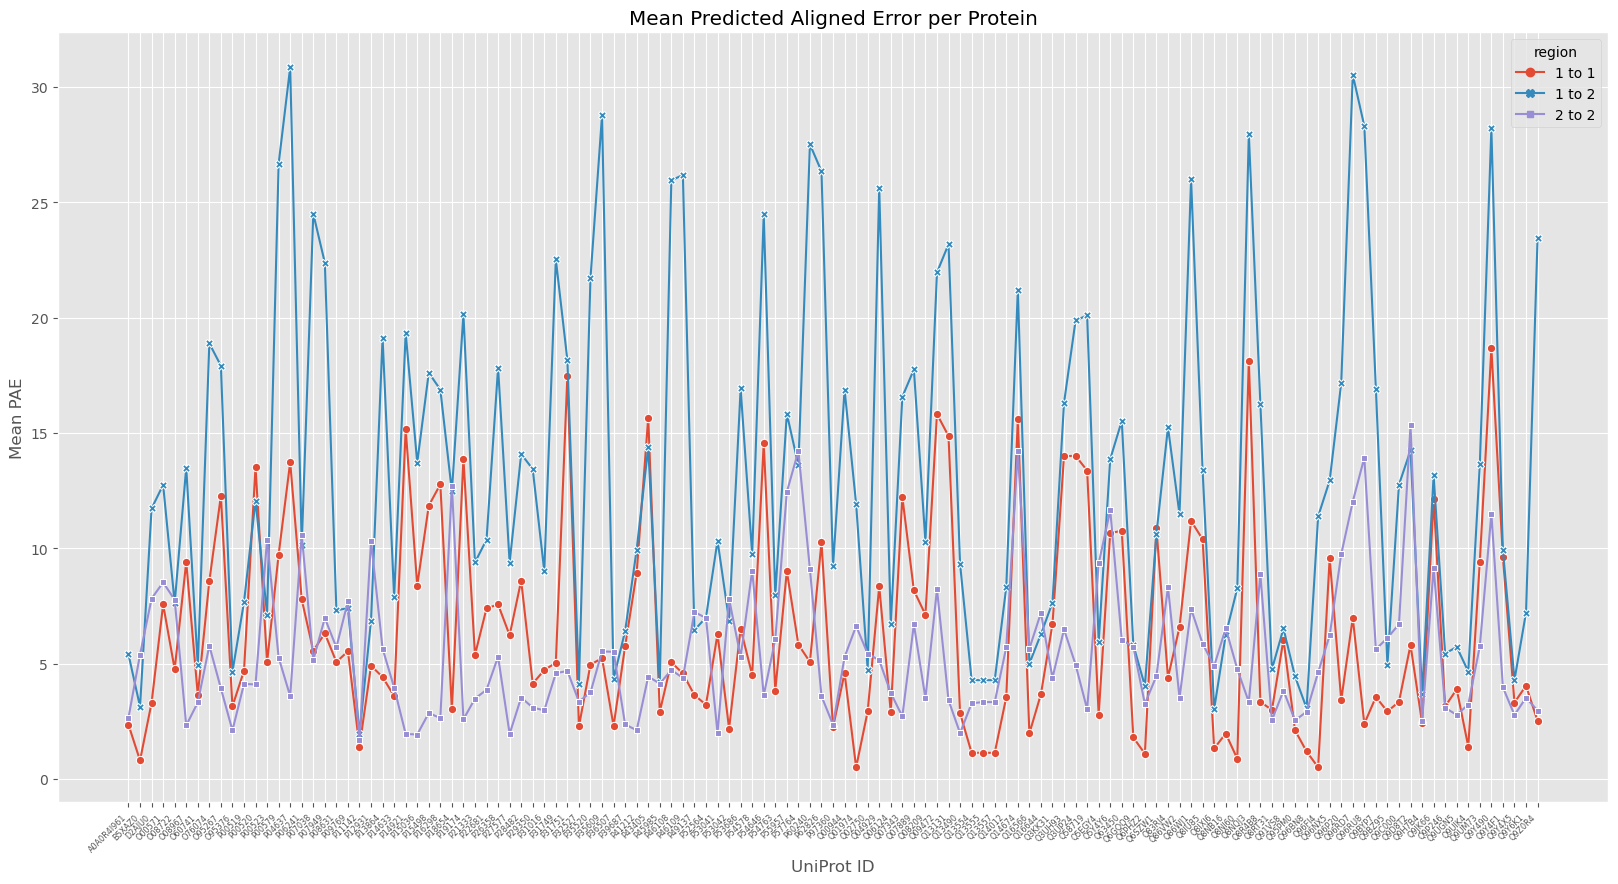

In [23]:
# This is for calculating percent that are within 2.5A of closed position. 
df_disorder = pd.read_csv('./project_pipeline/data/disorder.tsv', sep='\t').astype('object')
df_pae = df_disorder[['uniprot', 'mean_pae_1_1', 'mean_pae_1_2', 'mean_pae_2_2']]

plt.style.use('ggplot')
# Rename columns
df_pae = df_pae.rename(columns={'mean_pae_1_1': '1 to 1', 'mean_pae_1_2': '1 to 2', 'mean_pae_2_2': '2 to 2'})
df_pae = df_pae.drop_duplicates()
df_melt = df_pae.melt(id_vars=['uniprot'], var_name='region', value_name='mean_pae')

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

sns.lineplot(data=df_melt, x='uniprot', y='mean_pae', hue='region', style='region', markers=True, dashes=False, ax=ax)
ax.set_xlabel('UniProt ID')
ax.set_ylabel('Mean PAE')
ax.set_title('Mean Predicted Aligned Error per Protein')
plt.xticks(rotation=45, fontsize='xx-small', ha='right')

plt.savefig('./project_pipeline/data/figures/mean_pae.png', dpi=300, bbox_inches='tight')

c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

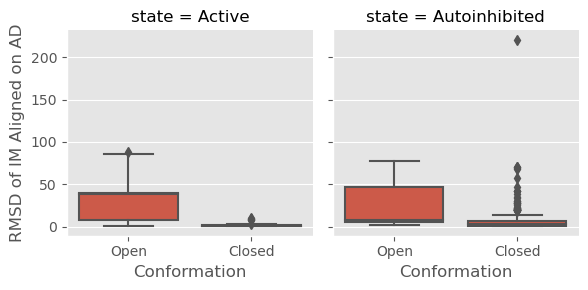

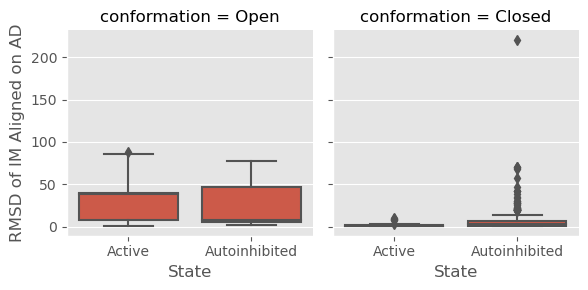

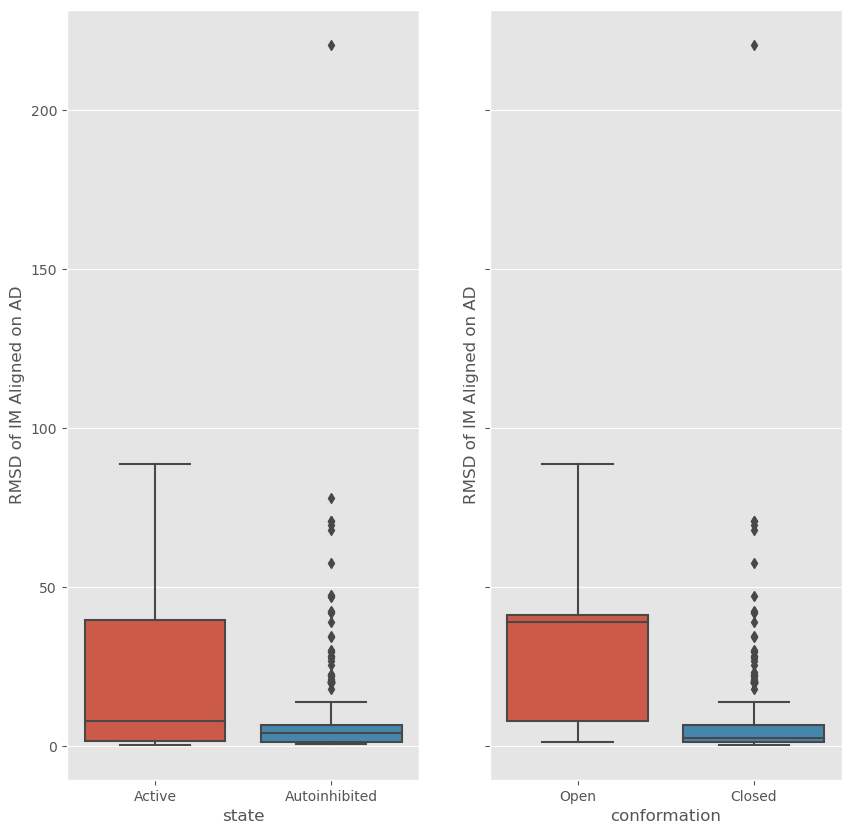

In [28]:
df_disorder = df_disorder.astype({'region_1_mean_plddt': 'float', '2_comp': 'float'})
df_active = df_disorder[df_disorder['state'] == 'Active']
df_autoin = df_disorder[df_disorder['state'] == 'Autoinhibited']
df_open = df_disorder[df_disorder['conformation'] == 'Open']
df_closed = df_disorder[df_disorder['conformation'] == 'Closed']

g1 = sns.FacetGrid(data=df_disorder, col='state')
g1.map(sns.boxplot, 'conformation', '2_comp', order=['Open', 'Closed'])
g1.set_axis_labels('Conformation', 'RMSD of IM Aligned on AD')
g1.savefig('./project_pipeline/data/figures/rmsd_state.png', dpi=300, bbox_inches='tight')

g2 = sns.FacetGrid(data=df_disorder, col='conformation')
g2.map(sns.boxplot, 'state', '2_comp', order=['Active', 'Autoinhibited'])
g2.set_axis_labels('State', 'RMSD of IM Aligned on AD')
g2.savefig('./project_pipeline/data/figures/rmsd_conformation.png', dpi=300, bbox_inches='tight')

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)

sns.boxplot(ax=axes[0], data=df_disorder, x='state', y='2_comp')
axes[0].set_ylabel('RMSD of IM Aligned on AD')

sns.boxplot(ax=axes[1], data=df_disorder, x='conformation', y='2_comp')
axes[1].set_ylabel('RMSD of IM Aligned on AD')

plt.savefig('./project_pipeline/data/figures/rmsd.png', dpi=300, bbox_inches='tight')

258


c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


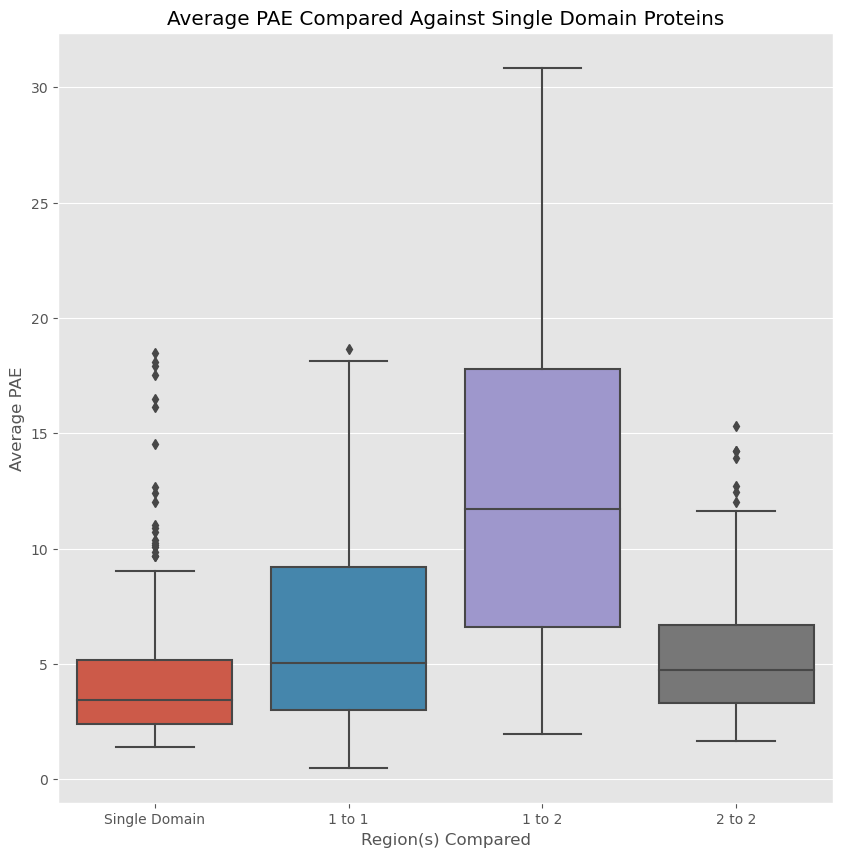

In [24]:
df_single = pd.read_csv('./project_pipeline/data/single_domain_pae.tsv', sep='\t').astype('object')

# Remove all rows with multiple regions. Comment this out if you want to see the difference.
for i in range(len(df_single)):
    region = df_single.loc[i, 'region']
    count = region.count('-')
    if count > 1:
        df_single = df_single.drop(i)

# Reformat the dataframe
df_single = df_single[['uniprot', 'mean_pae']].dropna()
df_single = df_single.astype({'mean_pae': 'float'})
df_single = df_single.rename(columns={'mean_pae': 'Single Domain'})
print(len(df_single))



df_all = df_single.merge(df_pae, how='outer')
df_all_melt = df_all.melt(id_vars=['uniprot'], var_name='region', value_name='mean_pae')

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
sns.boxplot(data=df_all_melt, x='region', y='mean_pae', ax=ax)
ax.set_xlabel('Region(s) Compared')
ax.set_ylabel('Average PAE')
ax.set_title('Average PAE Compared Against Single Domain Proteins')

plt.savefig('./project_pipeline/data/figures/single_domain.png')
plt.show()


89


c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\test_snek\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


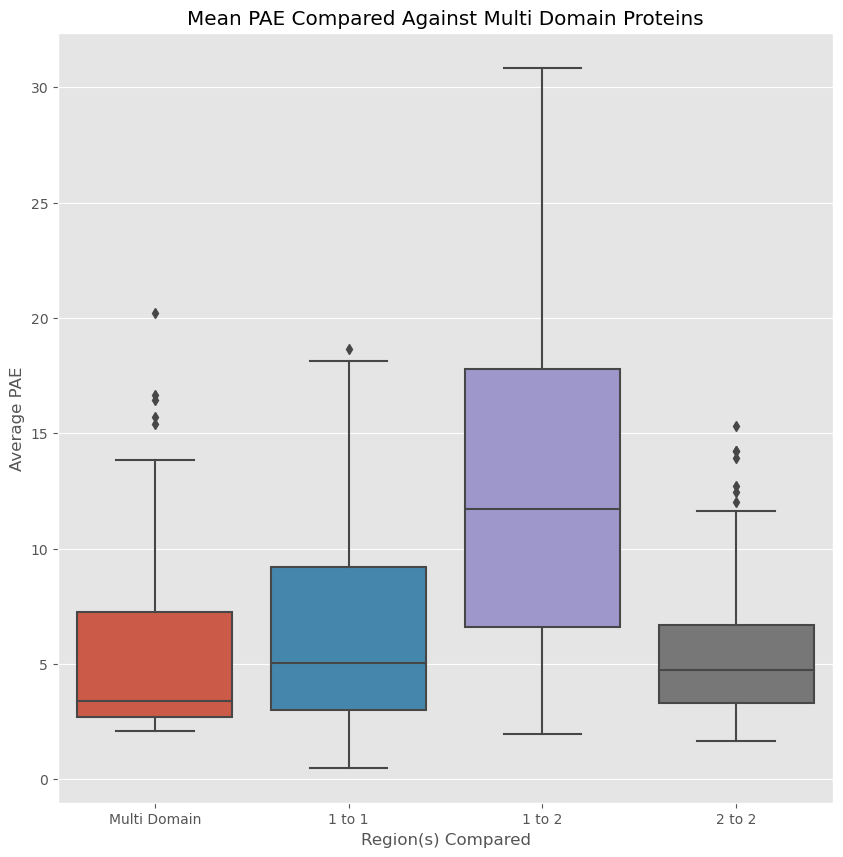

In [25]:
df_multi = pd.read_csv('./project_pipeline/data/multi_domain_pae.tsv', sep='\t').astype('object')

# Reformat the dataframe
df_multi = df_multi[['uniprot', 'mean_pae']].dropna()
df_multi = df_multi.astype({'mean_pae': 'float'})
df_multi = df_multi.rename(columns={'mean_pae': 'Multi Domain'})
print(len(df_multi))



df_all = df_multi.merge(df_pae, how='outer')
df_all_melt = df_all.melt(id_vars=['uniprot'], var_name='region', value_name='mean_pae')

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
sns.boxplot(data=df_all_melt, x='region', y='mean_pae', ax=ax)
ax.set_xlabel('Region(s) Compared')
ax.set_ylabel('Average PAE')
ax.set_title('Mean PAE Compared Against Multi Domain Proteins')

plt.savefig('./project_pipeline/data/figures/multi_domain.png')
plt.show()
